# Indian Agricultural Crop Yield Predictions

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/crop-yield-in-indian-states-dataset/crop_yield.csv
/kaggle/input/crop-datasets-for-all-indian-states-2010-2017/Crops_data.csv


# Loading Data

In [2]:
data = pd.read_csv('/kaggle/input/crop-yield-in-indian-states-dataset/crop_yield.csv')

In [3]:
data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
data.shape

(19689, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [6]:
data.isna().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [7]:
data.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


# Exploratory Data Analysis

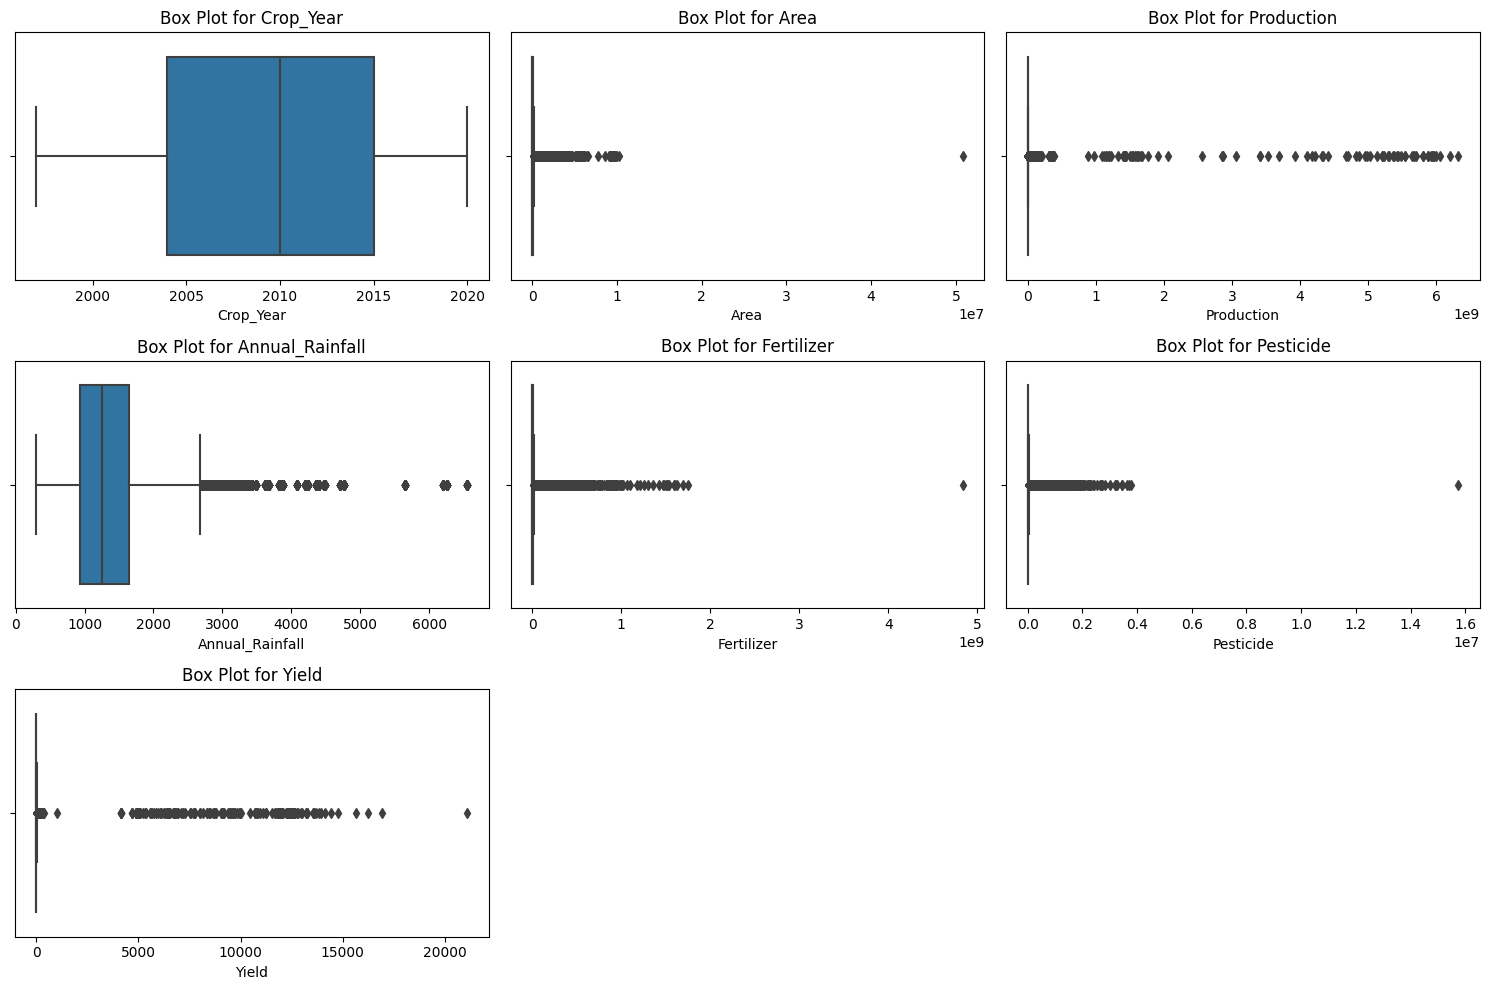

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_outliers(data):
    """
    Plots box plots for each numerical column to visualize outliers.

    Args:
        data (pd.DataFrame): The DataFrame containing the numerical columns.
    """

    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot for {column}')

    plt.tight_layout()
    plt.show()

plot_outliers(data)

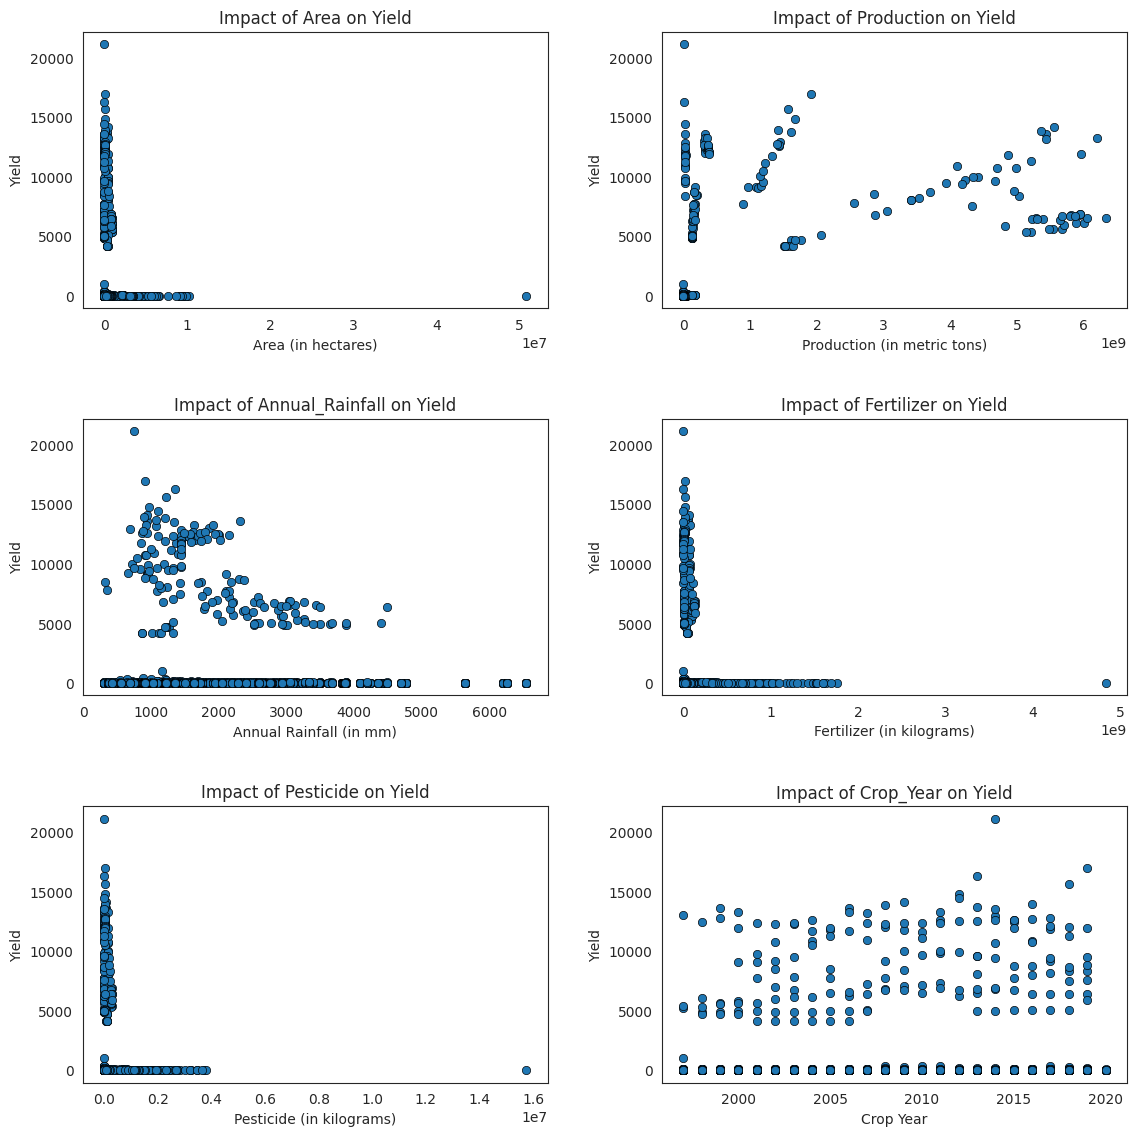

In [12]:
sns.set_style("white")

features_with_units = {
    'Area': 'Area (in hectares)',
    'Production': 'Production (in metric tons)',
    'Annual_Rainfall': 'Annual Rainfall (in mm)',
    'Fertilizer': 'Fertilizer (in kilograms)',
    'Pesticide': 'Pesticide (in kilograms)',  
    'Crop_Year': 'Crop Year'
}

num_plots = len(features_with_units)
ncols = 2
nrows = (num_plots + 1) // ncols  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))
axes = axes.flatten()  

for i, (feature, label) in enumerate(features_with_units.items()):
    sns.scatterplot(x=data[feature], y=data['Yield'], ax=axes[i], edgecolor= 'k')
    axes[i].set_title(f'Impact of {feature} on Yield')
    axes[i].set_xlabel(label)
    axes[i].set_ylabel('Yield')

plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.4) 

# plt.savefig("int_float.png", format='png', dpi=300)

plt.show()

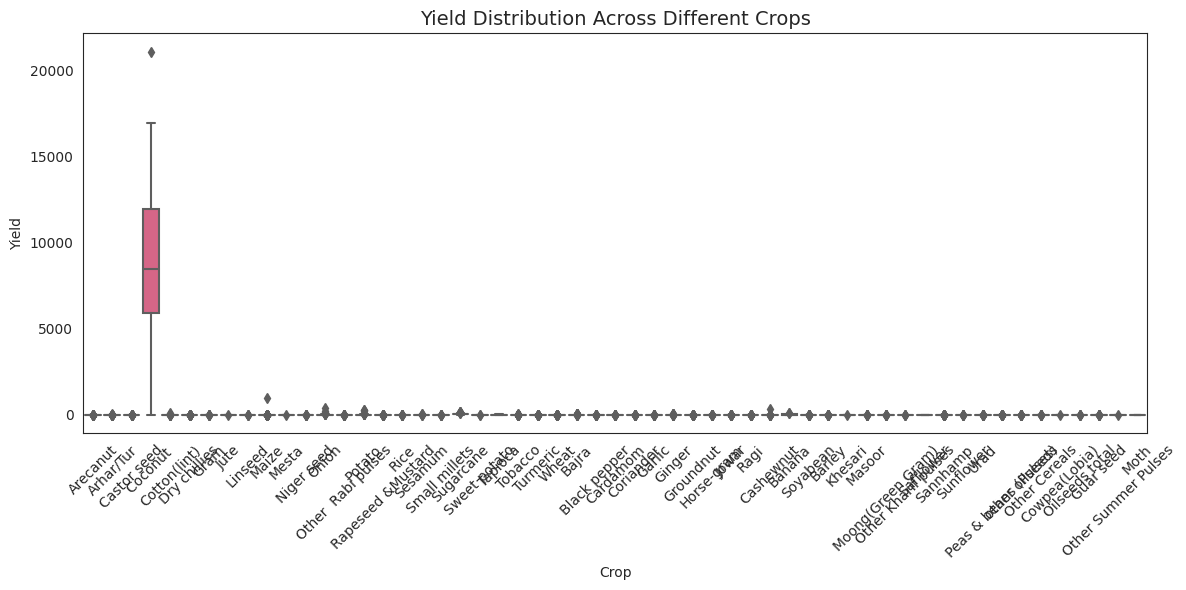

In [14]:
dark_pink = "#E75480"
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='Yield', data=data, palette=[dark_pink])
plt.title("Yield Distribution Across Different Crops", fontsize=14)
plt.xlabel("Crop")
plt.ylabel("Yield")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data-Preprocessing

In [15]:
import pandas as pd

numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print(f"Data after outlier removal has {data.shape[0]} rows and {data.shape[1]} columns.")


Data after outlier removal has 8779 rows and 10 columns.


In [16]:
# Q1 = data['Yield'].quantile(0.25)
# Q3 = data['Yield'].quantile(0.75)
# IQR = Q3 - Q1
# data = data[(data['Yield'] >= Q1 - 1.5 * IQR) & (data['Yield'] <= Q3 + 1.5 * IQR)]

data['Fertilizer_per_Area'] = data['Fertilizer'] / data['Area']
data['Pesticide_per_Area'] = data['Pesticide'] / data['Area']

data_encoded = pd.get_dummies(data, columns=['Crop', 'Season', 'State'], drop_first=True)

print("New data shape after augmentation:", data.shape)
print("Encoded data shape:", data_encoded.shape)
print("\nSample of processed data:")
print(data_encoded.head())

New data shape after augmentation: (8779, 12)
Encoded data shape: (8779, 97)

Sample of processed data:
   Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
1       1997   6637.0        4685           2051.4   631643.29    2057.47   
2       1997    796.0          22           2051.4    75755.32     246.76   
4       1997   1739.0         794           2051.4   165500.63     539.09   
5       1997  13587.0        9073           2051.4  1293074.79    4211.97   
6       1997   2979.0        1507           2051.4   283511.43     923.49   

      Yield  Fertilizer_per_Area  Pesticide_per_Area  Crop_Arhar/Tur  ...  \
1  0.710435                95.17                0.31            True  ...   
2  0.238333                95.17                0.31           False  ...   
4  0.420909                95.17                0.31           False  ...   
5  0.643636                95.17                0.31           False  ...   
6  0.465455                95.17                

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_encoded.drop('Yield', axis=1)
Y = data_encoded['Yield']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (7023, 96)
Test set shape: (1756, 96)


## Initialize and train the MLP model

## Applying MLP without Regularization

In [33]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32), 
    max_iter=500,            
    random_state=42, 
    verbose=True, 
    alpha = 0.0,
    tol=1e-5,                
    n_iter_no_change=500
)
mlp_model.fit(X_train_scaled, Y_train)

Y_pred_mlp = mlp_model.predict(X_test_scaled)

mlp_mse = mean_squared_error(Y_test, Y_pred_mlp)
print(f"MLP Test MSE: {mlp_mse}")

Iteration 1, loss = 0.45937303
Iteration 2, loss = 0.14925143
Iteration 3, loss = 0.10499565
Iteration 4, loss = 0.08699199
Iteration 5, loss = 0.07590427
Iteration 6, loss = 0.06739545
Iteration 7, loss = 0.06134816
Iteration 8, loss = 0.05640960
Iteration 9, loss = 0.05313587
Iteration 10, loss = 0.04925402
Iteration 11, loss = 0.04700464
Iteration 12, loss = 0.04484920
Iteration 13, loss = 0.04313744
Iteration 14, loss = 0.04139333
Iteration 15, loss = 0.04094985
Iteration 16, loss = 0.03875534
Iteration 17, loss = 0.03747593
Iteration 18, loss = 0.03647503
Iteration 19, loss = 0.03563192
Iteration 20, loss = 0.03497615
Iteration 21, loss = 0.03426797
Iteration 22, loss = 0.03450840
Iteration 23, loss = 0.03318227
Iteration 24, loss = 0.03284554
Iteration 25, loss = 0.03190652
Iteration 26, loss = 0.03120912
Iteration 27, loss = 0.03045503
Iteration 28, loss = 0.03065142
Iteration 29, loss = 0.02949159
Iteration 30, loss = 0.02919275
Iteration 31, loss = 0.02886142
Iteration 32, los

## Applying MLP with Regularization

In [34]:
mlp_model_reg = MLPRegressor(hidden_layer_sizes=(64, 32), 
                             alpha=0.01, 
                             max_iter=500, 
                             random_state=42, 
                             verbose =True,
                             tol=1e-5,         
                             early_stopping=True,           
                             validation_fraction=0.1,     
                             n_iter_no_change=10,
                            )
mlp_model_reg.fit(X_train_scaled, Y_train)
Y_pred_mlp_reg = mlp_model_reg.predict(X_test_scaled)

Iteration 1, loss = 0.48706581
Validation score: 0.183073
Iteration 2, loss = 0.16432840
Validation score: 0.484279
Iteration 3, loss = 0.11432860
Validation score: 0.584782
Iteration 4, loss = 0.09376109
Validation score: 0.637960
Iteration 5, loss = 0.08169637
Validation score: 0.672162
Iteration 6, loss = 0.07284276
Validation score: 0.695661
Iteration 7, loss = 0.06633501
Validation score: 0.718776
Iteration 8, loss = 0.06133709
Validation score: 0.737030
Iteration 9, loss = 0.05745963
Validation score: 0.749950
Iteration 10, loss = 0.05424945
Validation score: 0.759351
Iteration 11, loss = 0.05112400
Validation score: 0.767153
Iteration 12, loss = 0.04874746
Validation score: 0.776938
Iteration 13, loss = 0.04716709
Validation score: 0.776911
Iteration 14, loss = 0.04509932
Validation score: 0.786999
Iteration 15, loss = 0.04367771
Validation score: 0.791012
Iteration 16, loss = 0.04232881
Validation score: 0.794228
Iteration 17, loss = 0.04132260
Validation score: 0.799346
Iterat

## Applying CNN

GlobalAveragePooling1D is better than Flatten for reducing dimensionality, preventing overfitting, and generalizing in sequential tasks.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D

def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_shape, 1)),
        BatchNormalization(),
        Conv1D(128, kernel_size=3, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        GlobalAveragePooling1D(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    return model

In [21]:
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

cnn_model = create_cnn_model(X_train_scaled.shape[1])
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = cnn_model.fit(
    X_train_cnn, 
    Y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)
Y_pred_cnn = cnn_model.predict(X_test_cnn)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.6336 - mae: 0.5798 - val_loss: 1.4104 - val_mae: 1.0927
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4579 - mae: 0.5009 - val_loss: 1.1116 - val_mae: 0.9654
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4114 - mae: 0.4711 - val_loss: 0.4365 - val_mae: 0.5174
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3859 - mae: 0.4535 - val_loss: 0.3892 - val_mae: 0.4772
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3708 - mae: 0.4449 - val_loss: 0.3605 - val_mae: 0.4474
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3396 - mae: 0.4190 - val_loss: 0.3805 - val_mae: 0.5060
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3044 - mae: 0.3987 - val_loss: 0.3351 - val_mae: 0.3859
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3398 - mae: 0.4172 - val_loss: 0.3281 - val_mae: 0.4403
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/

## Evaluation function

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    return mse, rmse, mae, r2

results_mlp = evaluate_model(Y_test, Y_pred_mlp, "MLP without Regularization")
results_mlp_reg = evaluate_model(Y_test, Y_pred_mlp_reg, "MLP with Regularization")
results_cnn = evaluate_model(Y_test, Y_pred_cnn.flatten(), "CNN")




MLP without Regularization Performance Metrics:
MSE: 0.0848
RMSE: 0.2913
MAE: 0.1789
R² Score: 0.8242

MLP with Regularization Performance Metrics:
MSE: 0.0863
RMSE: 0.2938
MAE: 0.1741
R² Score: 0.8211

CNN Performance Metrics:
MSE: 0.2430
RMSE: 0.4929
MAE: 0.3470
R² Score: 0.4965


## Plotting results

In [38]:
import matplotlib.pyplot as plt


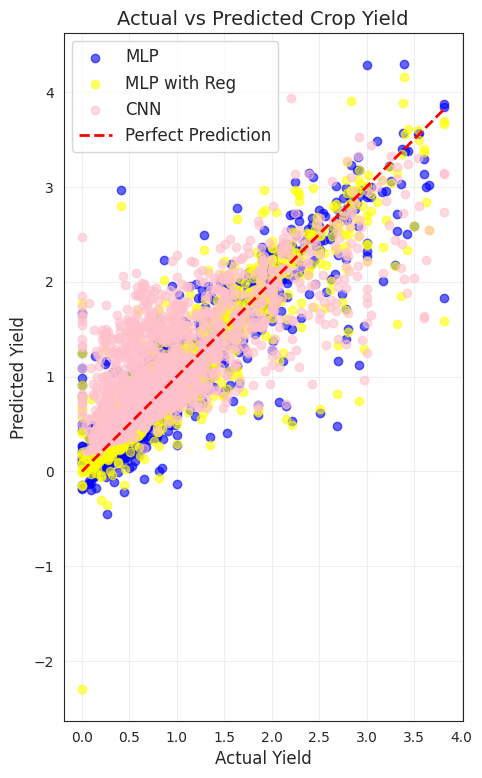

In [39]:

plt.figure(figsize=(9, 12))
plt.subplot(1, 2, 1)

plt.scatter(Y_test, Y_pred_mlp, alpha=0.6, label='MLP', color='blue')
plt.scatter(Y_test, Y_pred_mlp_reg, alpha=0.6, label='MLP with Reg', color='yellow')
plt.scatter(Y_test, Y_pred_cnn, alpha=0.6, label='CNN', color='pink')

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Yield', fontsize=12)
plt.ylabel('Predicted Yield', fontsize=12)
plt.title('Actual vs Predicted Crop Yield', fontsize=14)
plt.legend(fontsize=12)

plt.grid(alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


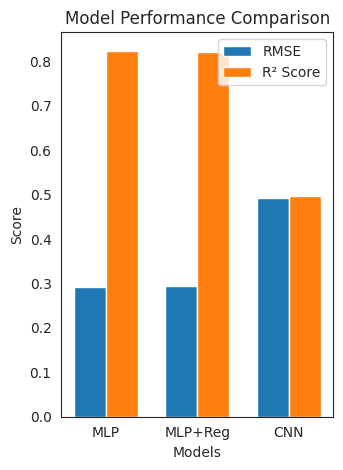

In [40]:
plt.subplot(1, 2, 2)
models = ['MLP', 'MLP+Reg', 'CNN']
rmse_values = [results_mlp[1], results_mlp_reg[1], results_cnn[1]]
r2_values = [results_mlp[3], results_mlp_reg[3], results_cnn[3]]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, rmse_values, width, label='RMSE')
plt.bar(x + width/2, r2_values, width, label='R² Score')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()

plt.tight_layout()
plt.show()



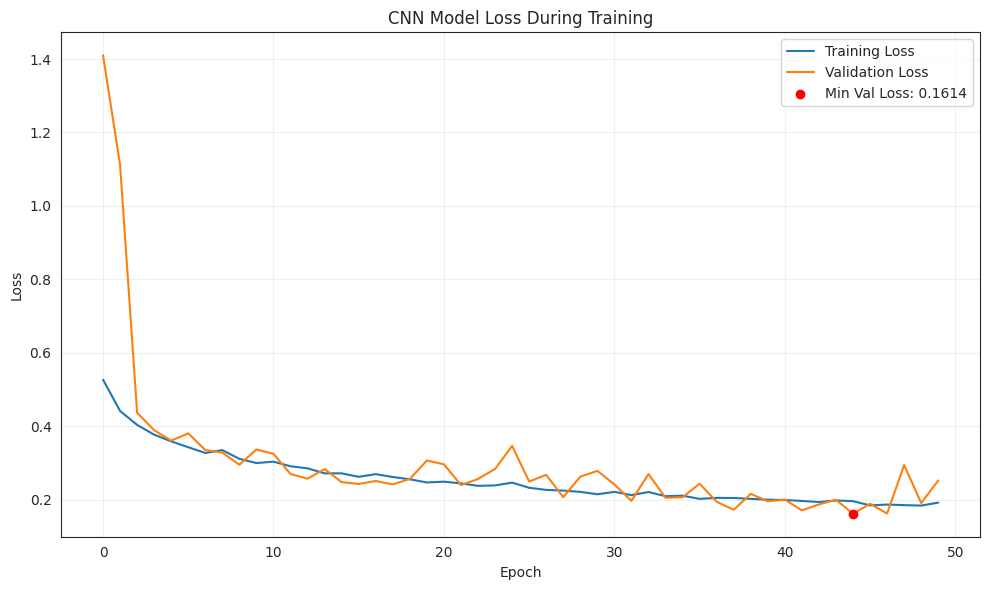

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(alpha=0.3)


min_val_loss_epoch = history.history['val_loss'].index(min(history.history['val_loss']))
plt.scatter(min_val_loss_epoch, min(history.history['val_loss']), 
            color='red', label=f'Min Val Loss: {min(history.history["val_loss"]):.4f}', zorder=5)


plt.legend(fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

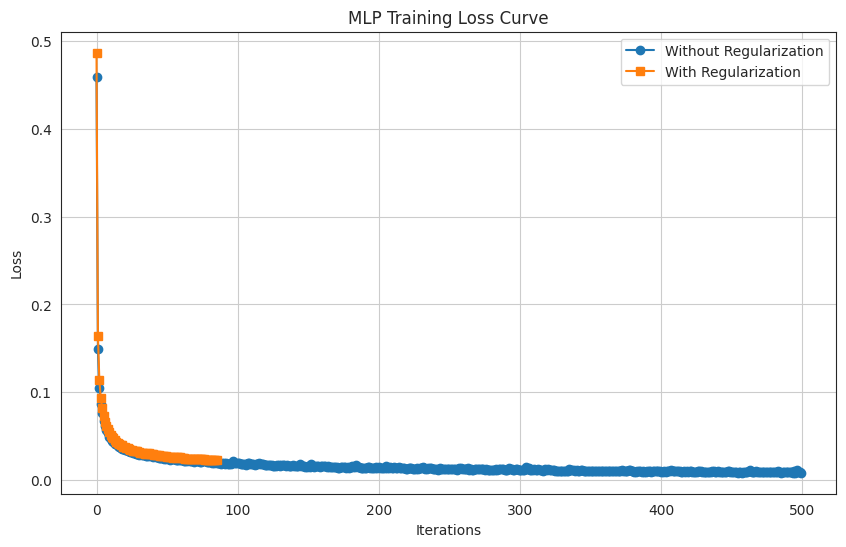

In [42]:
loss_no_reg = mlp_model.loss_curve_
loss_with_reg = mlp_model_reg.loss_curve_

plt.figure(figsize=(10, 6))
plt.plot(loss_no_reg, label='Without Regularization', marker='o')
plt.plot(loss_with_reg, label='With Regularization', marker='s')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

MLPs (with or without regularization) provide superior performance compared to CNNs, which are better suited for spatially or temporally structured data. Regularization (L2) in MLP had minimal impact, emphasizing the need to balance complexity and overfitting risks.

In [45]:
import pandas as pd
from tabulate import tabulate

data = {
    "Model": ["MLP", "MLP + Reg", "CNN"],
    "RMSE": [0.2913, 0.2938, 0.4929], 
    "MSE": [0.0848, 0.0863, 0.2430],  
    "MAE": [0.1789, 0.1741, 0.3470],  
    "R² Score": [0.8242, 0.8211, 0.4965] 
}

performance_df = pd.DataFrame(data)

print("Performance Metrics Summary:")
print(tabulate(performance_df, headers="keys", tablefmt="fancy_grid", showindex=False))

hyperparams = {
    "Model": ["MLP", "MLP + Reg", "CNN"],
    "Hidden Layers": ["(64, 32)", "(64, 32)", "Conv1D (64, 128)"],
    "Alpha (L2 Regularization)": ["0", "0.01", "N/A"],
    "Max Iterations / Epochs": [500, 500, "50 Epochs"],
    "Early Stopping": ["No", "Yes", "Yes (Patience=5)"],
    "Batch Size": ["Default", "Default", "32"]
}

hyperparams_df = pd.DataFrame(hyperparams)


print("\nHyperparameter Settings Summary:")
print(tabulate(hyperparams_df, headers="keys", tablefmt="fancy_grid", showindex=False))

Performance Metrics Summary:
╒═══════════╤════════╤════════╤════════╤════════════╕
│ Model     │   RMSE │    MSE │    MAE │   R² Score │
╞═══════════╪════════╪════════╪════════╪════════════╡
│ MLP       │ 0.2913 │ 0.0848 │ 0.1789 │     0.8242 │
├───────────┼────────┼────────┼────────┼────────────┤
│ MLP + Reg │ 0.2938 │ 0.0863 │ 0.1741 │     0.8211 │
├───────────┼────────┼────────┼────────┼────────────┤
│ CNN       │ 0.4929 │ 0.243  │ 0.347  │     0.4965 │
╘═══════════╧════════╧════════╧════════╧════════════╛

Hyperparameter Settings Summary:
╒═══════════╤══════════════════╤═════════════════════════════╤═══════════════════════════╤══════════════════╤══════════════╕
│ Model     │ Hidden Layers    │ Alpha (L2 Regularization)   │ Max Iterations / Epochs   │ Early Stopping   │ Batch Size   │
╞═══════════╪══════════════════╪═════════════════════════════╪═══════════════════════════╪══════════════════╪══════════════╡
│ MLP       │ (64, 32)         │ 0                           │ 500          